In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [94]:
prev_frame = np.load('lineplume_sims_3D/temp/frame_257.npy')
curr_frame = np.load('lineplume_sims_3D/temp/frame_258.npy')

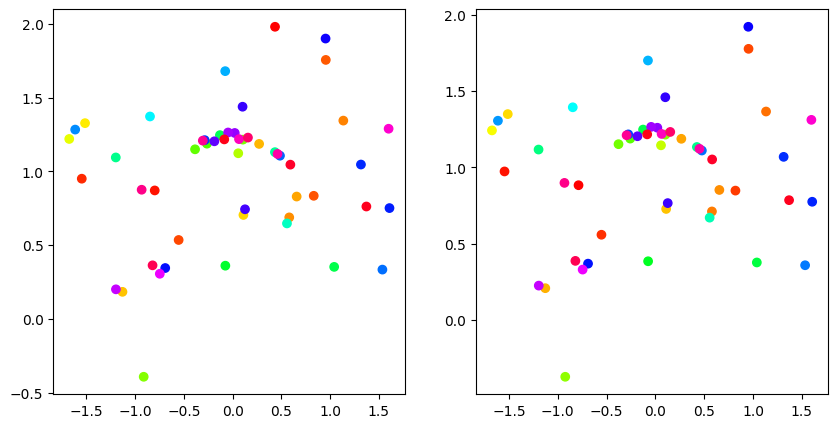

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(prev_frame[:, 2], prev_frame[:, 3], c=prev_frame[:, 0], cmap='hsv')
ax[1].scatter(curr_frame[:, 2], curr_frame[:, 3], c=curr_frame[:, 0], cmap='hsv')

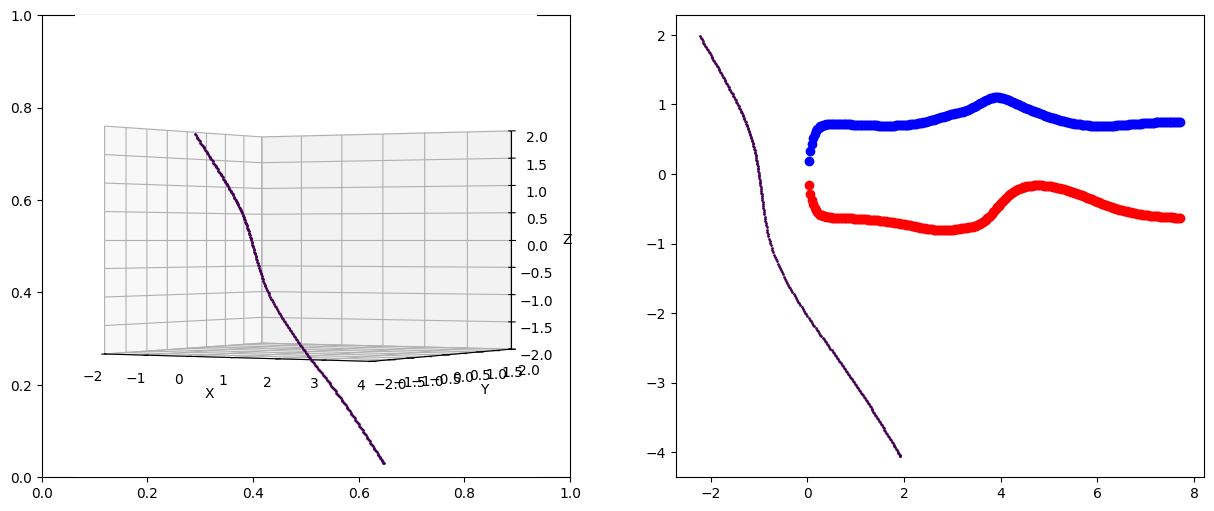

In [98]:
fled_ID = [float(0)]
fled_frame = 257
U_avg_frame = 0
dt = 0.03

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1 = fig.add_subplot(121, projection='3d')


for i in range(1, fled_frame+1):
    data_snap = np.load('lineplume_sims_3D/temp/frame_{}.npy'.format(i))
    mask = np.isin(data_snap[:, 0], fled_ID)
    fled_particle_data = data_snap[mask]

    ax1.scatter(fled_particle_data[:, 1] + U_avg_frame * dt*i, fled_particle_data[:, 2], fled_particle_data[:, 3], c=fled_particle_data[:, 3],  s=1)
    ax1.set_xlim([-2, 4])
    ax1.set_ylim([-2, 2])
    ax1.set_zlim([-2, 2])
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    # ax.xaxis._axinfo["grid"].update(color="grey", linestyle="--", linewidth=0.5)
    ax1.view_init(elev=0, azim=300)

    ax2.scatter(fled_particle_data[:, 1] + U_avg_frame * dt*i, fled_particle_data[:, 3], c=fled_particle_data[:, 3], s=1)
    for row in fled_particle_data:
        ax2.scatter(i*dt, row[4], c='r', label='FLED particle x-velocity')
        ax2.scatter(i*dt, row[6], c='b', label='FLED particle z-velocity')
    # ax2.legend()

plt.show()


    